# In this notebook "BFmainlib.py" is tested

## test for one image with full verbose

In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import cv2
from scripts.BFmainlib import BF_image, HSV_threshold, HSV_transform

In [2]:
test_image_class = BF_image(verbose=True)

In [3]:
test_image_class.load_image('../pictures/test_input_4.bmp')
test_image_class.preprocess_image()
test_image_class.segment_image()

Successfully loaded an image
Successfully preprocessed an image
Added object new_id='1'
Added object new_id='2'
Successfully HSV:segmented an image


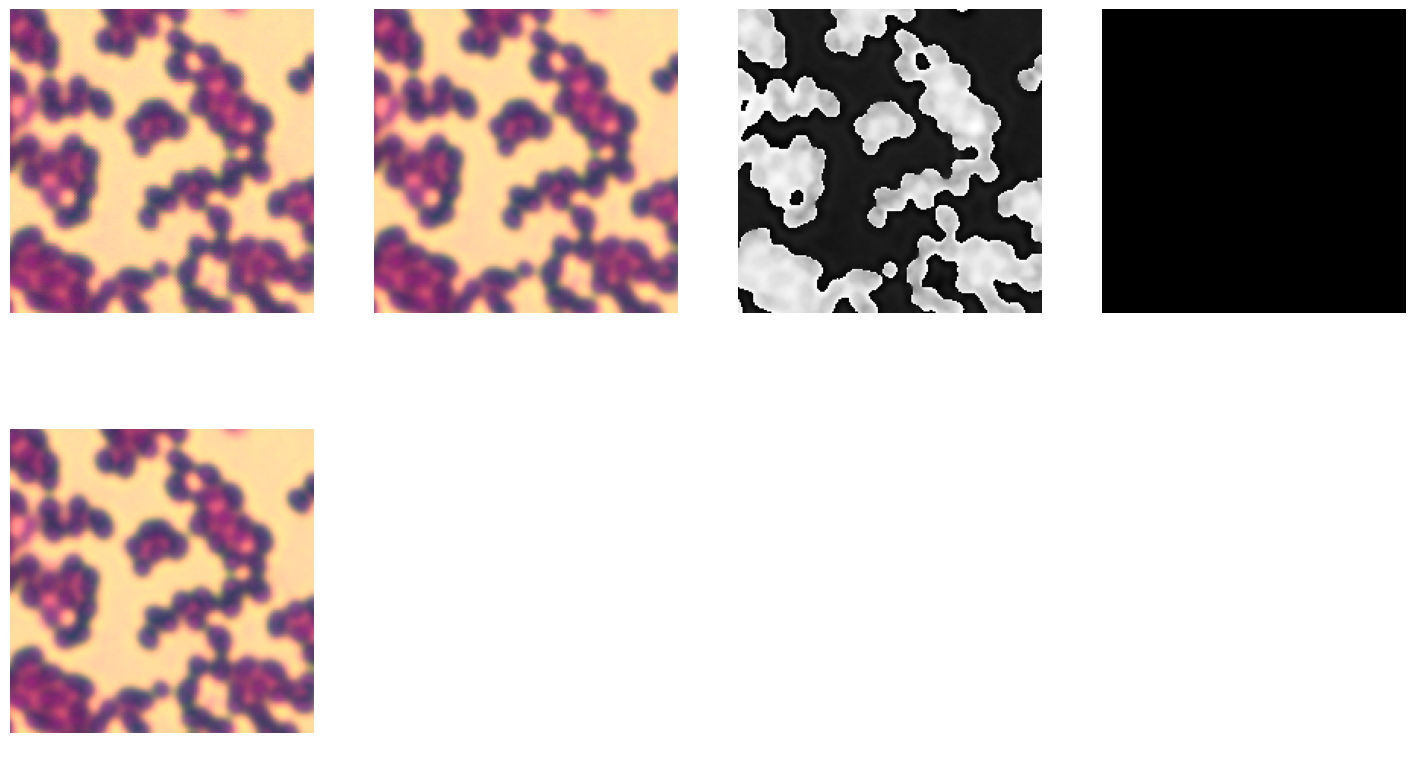

In [4]:
fig, axs = plt.subplots(2,4, figsize=(18,10))
axs[0][0].imshow(test_image_class.bacteria_image_loaded[600:800, 1000:1200])
axs[0][0].axis('off')

axs[0][1].imshow(test_image_class.bacteria_image_preprocessed[600:800, 1000:1200])
axs[0][1].axis('off')

axs[0][2].imshow(HSV_transform(test_image_class.bacteria_image_preprocessed)[600:800, 1000:1200, 0], cmap='gray')
axs[0][2].axis('off')

axs[0][3].imshow(HSV_threshold(HSV_transform(test_image_class.bacteria_image_preprocessed), type = 'simple')[600:800, 1000:1200], cmap='gray')
axs[0][3].axis('off')

axs[1][0].imshow(test_image_class.segment_draw()[600:800, 1000:1200])
axs[1][0].axis('off')

axs[1][1].axis('off')
axs[1][2].axis('off')
axs[1][3].axis('off')

plt.show()

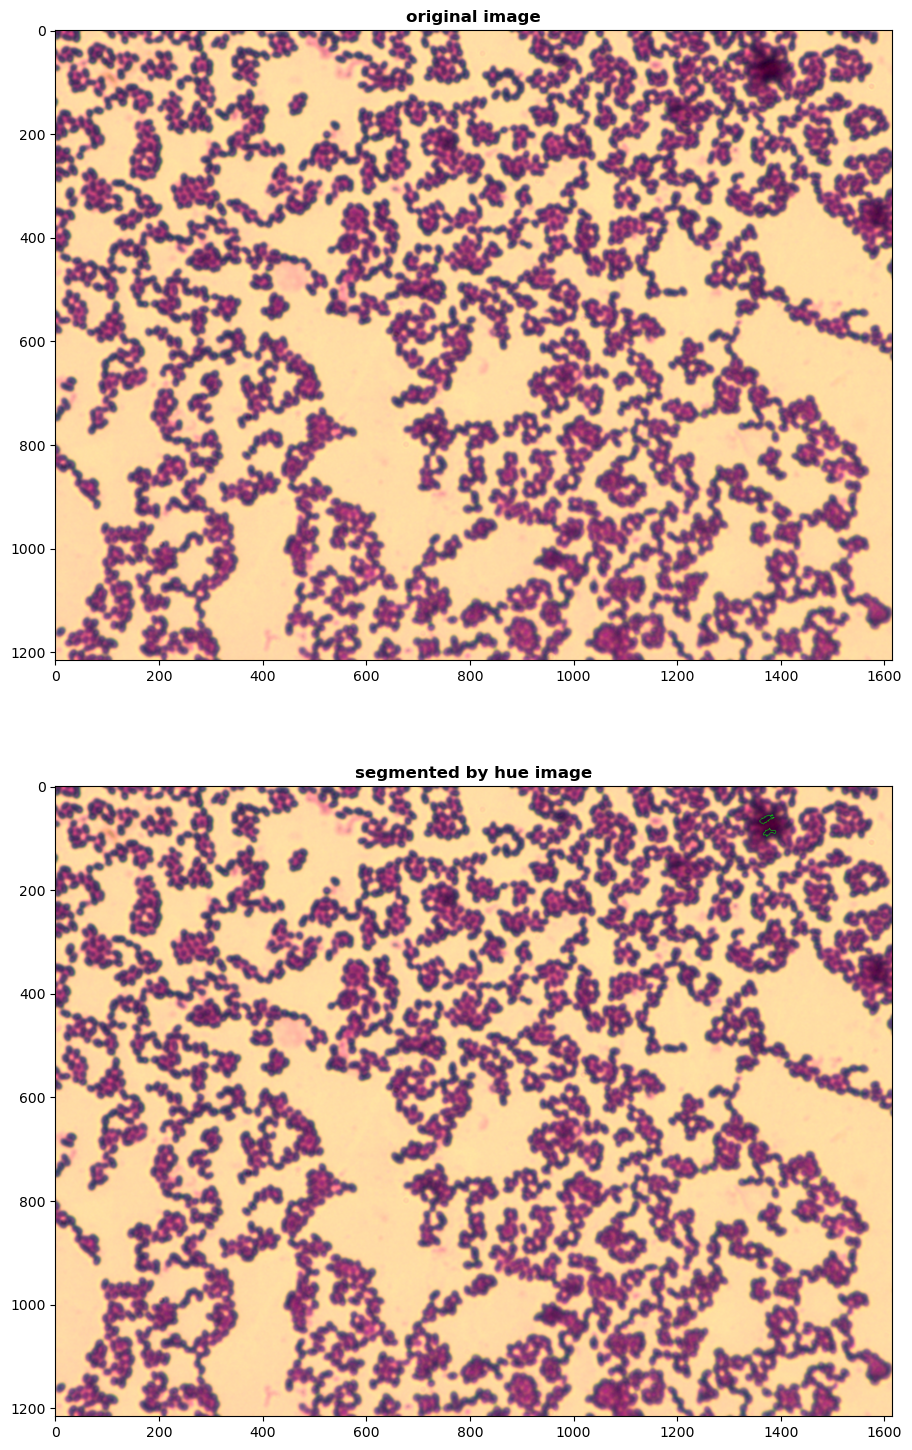

In [5]:
fig, axs = plt.subplots(2,1,figsize=(12,18))
axs[0].imshow(test_image_class.bacteria_image_preprocessed)
axs[0].set_title('original image', weight='bold')

axs[1].imshow(test_image_class.segment_draw())
axs[1].set_title('segmented by hue image', weight='bold')

plt.show()

# Test for 5 images w/o verbose

In [6]:
image_paths = [f'../pictures/test_input_{i}.bmp' for i in range(1, 6)]

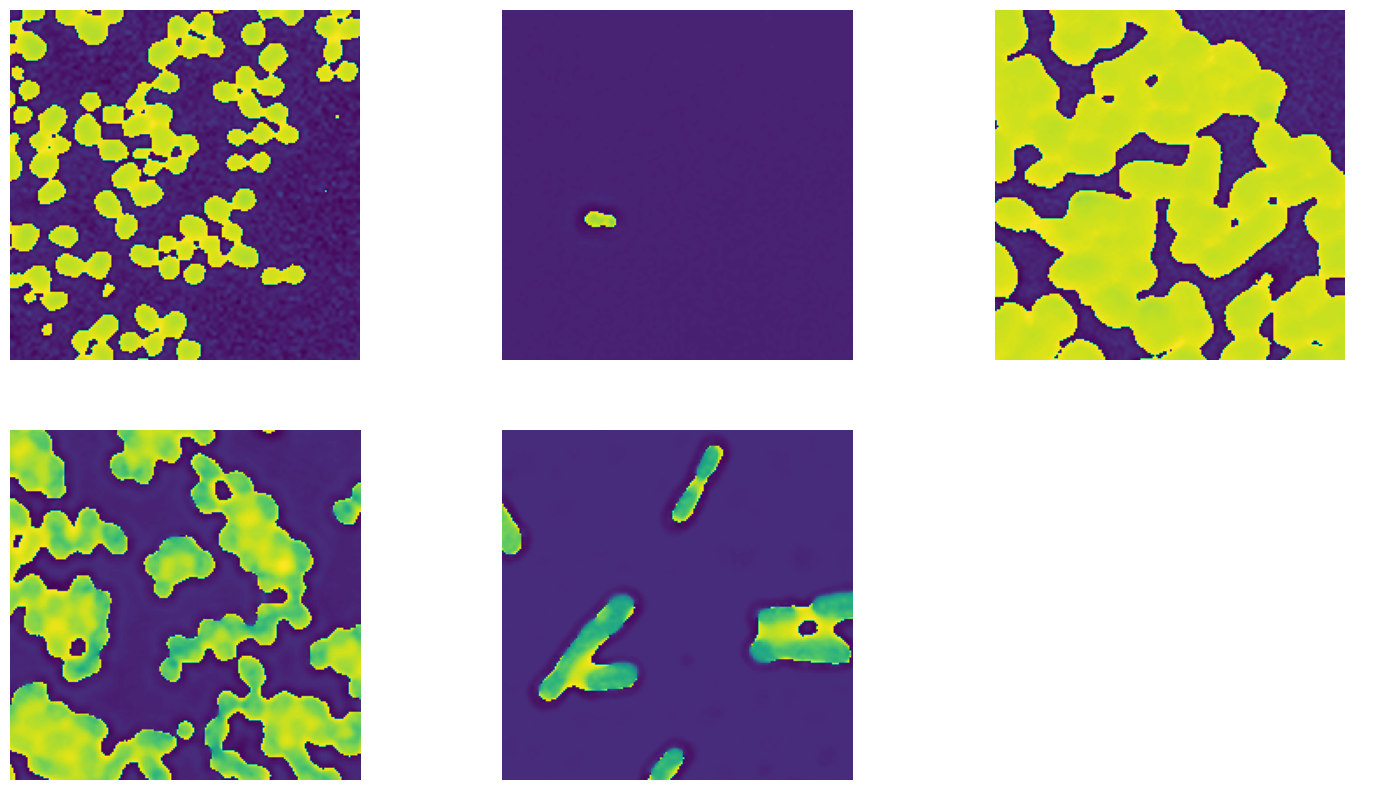

In [7]:
fig, axs = plt.subplots(2,3, figsize=(18,10))

for i in range(5):
    test_image_class = BF_image(verbose=False)
    test_image_class.load_image(image_paths[i])
    test_image_class.preprocess_image()
    test_image_class.segment_image()
    axs[i//3][i%3].imshow(HSV_transform(test_image_class.bacteria_image_preprocessed)[600:800, 1000:1200, 0])
    axs[i//3][i%3].axis('off')

axs[1][2].axis('off')
plt.show()


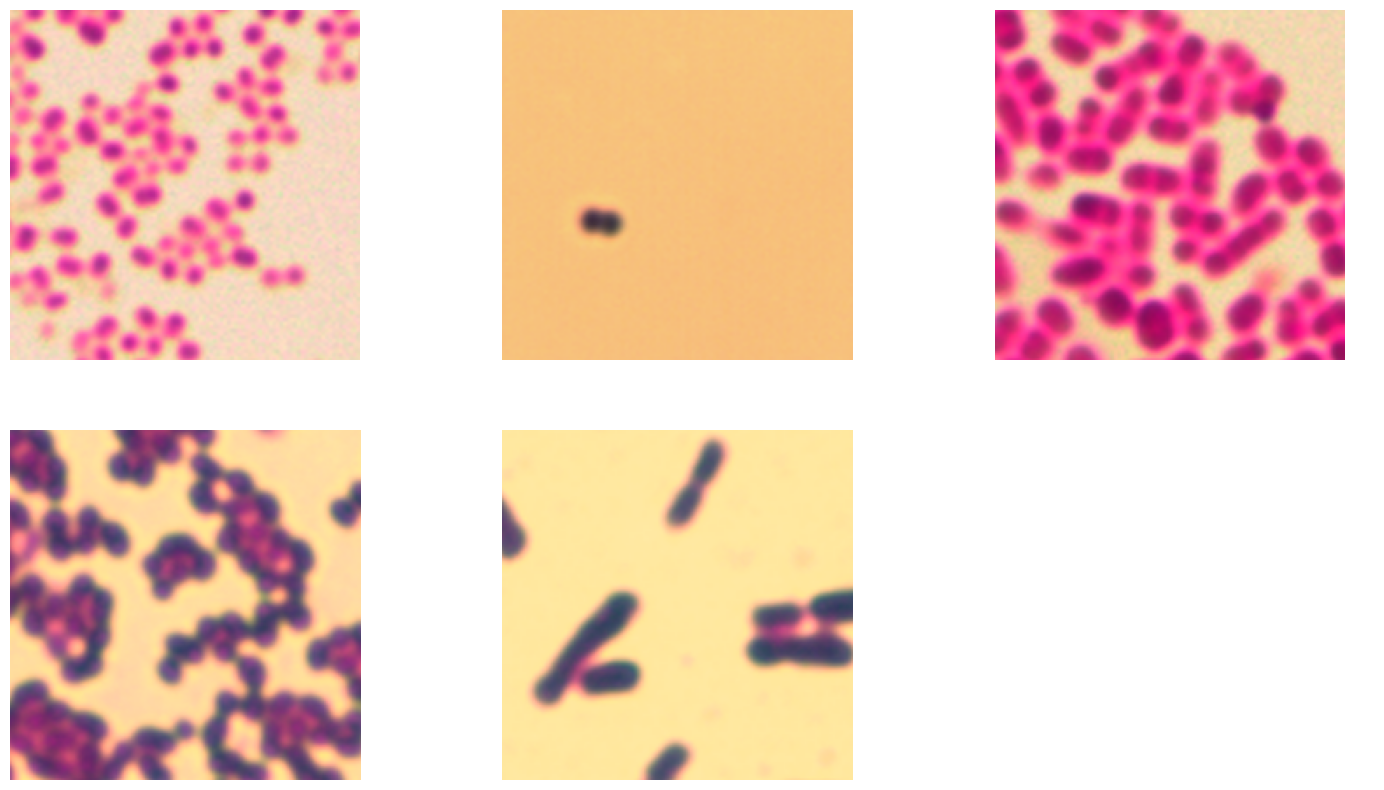

In [8]:
fig, axs = plt.subplots(2,3, figsize=(18,10))

for i in range(5):
    test_image_class = BF_image(verbose=False)
    test_image_class.load_image(image_paths[i])
    test_image_class.preprocess_image()
    test_image_class.segment_image()
    axs[i//3][i%3].imshow(test_image_class.segment_draw()[600:800, 1000:1200])
    axs[i//3][i%3].axis('off')

axs[1][2].axis('off')
plt.show()

# Inspecting the largest blobs

In [9]:
plt.figure()
test_image_class = BF_image(verbose=False)
test_image_class.load_image(image_paths[4])
test_image_class.preprocess_image()
test_image_class.segment_image()
x, y, w, h = cv2.boundingRect(test_image_class.objects_db['2'].object_countour_coords)
plt.imshow(test_image_class.object_draw(test_image_class.objects_db['2'].object_countour_coords)[y:y + h, x:x + w])
plt.axis('off')
plt.show()

KeyError: '2'

<Figure size 640x480 with 0 Axes>

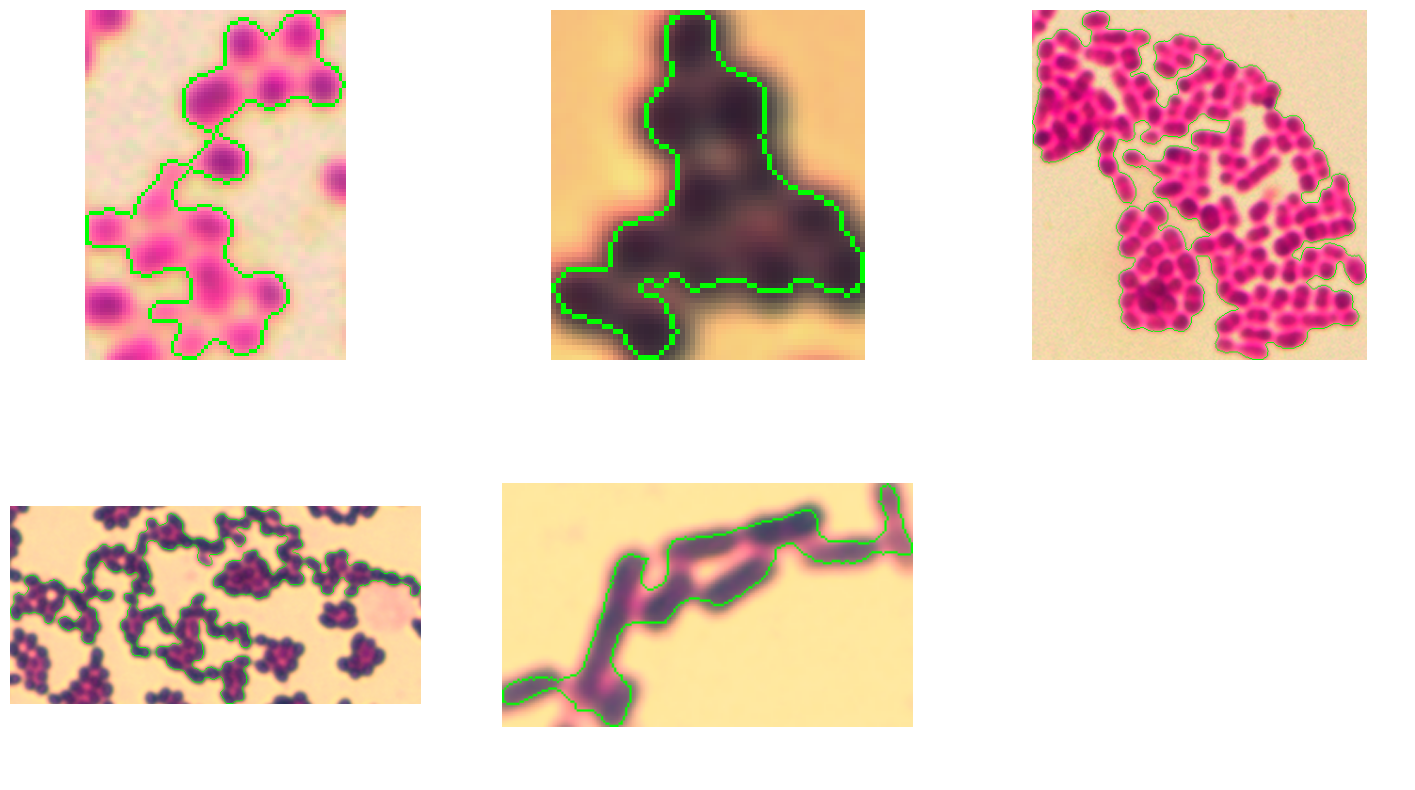

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(18,10))
for i in range(5):
    test_image_class = BF_image(verbose=False)
    test_image_class.load_image(image_paths[i])
    test_image_class.preprocess_image()
    test_image_class.segment_image()
    x, y, w, h = cv2.boundingRect(test_image_class.objects_db['2'].object_countour_coords)
    axs[i//3][i%3].imshow(test_image_class.object_draw(test_image_class.objects_db['2'].object_countour_coords)[y:y + h, x:x + w])
    axs[i//3][i%3].axis('off')

axs[1][2].axis('off')
plt.show()

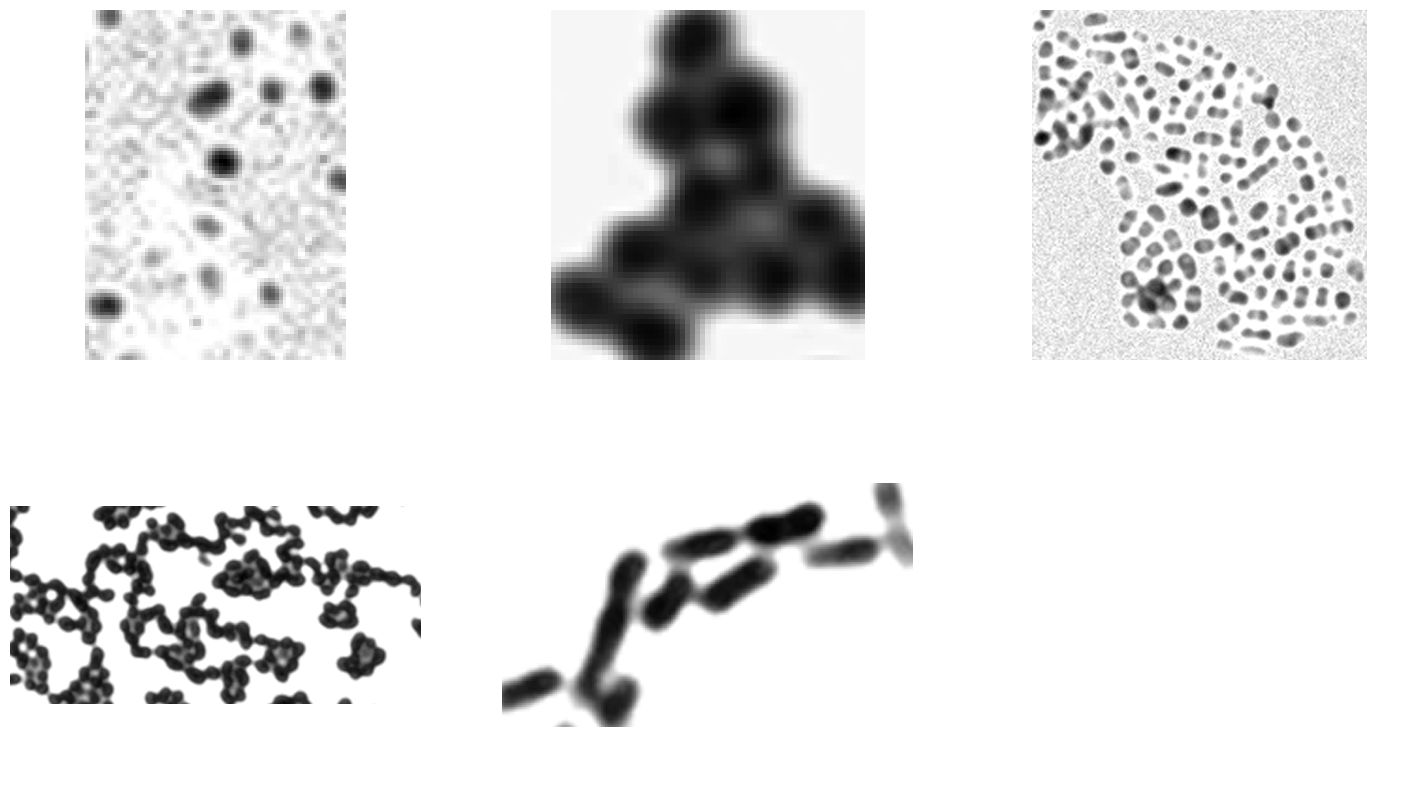

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(18,10))
for i in range(5):
    test_image_class = BF_image(verbose=False)
    test_image_class.load_image(image_paths[i])
    test_image_class.preprocess_image()
    test_image_class.segment_image()
    x, y, w, h = cv2.boundingRect(test_image_class.objects_db['2'].object_countour_coords)
    axs[i//3][i%3].imshow(HSV_transform(test_image_class.bacteria_image_preprocessed)[y:y + h, x:x + w,2], cmap='gray')
    # axs[i//3][i%3].imshow(test_image_class.bacteria_image_preprocessed[y:y + h, x:x + w,1], cmap='gray')
    axs[i//3][i%3].axis('off')

axs[1][2].axis('off')
plt.show()